### **Name: Syed Umair Andrabi**

### **Reg. No: 22MCB0015**

Dataset link: https://hpi.de/en/naumann/projects/repeatability/datasets/dblp-dataset.html

In [1]:
!pip install pandas xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xmltodict

# **Preparing the data**

Parsing XML and converting to dataframe

In [3]:
# Required Libraries
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('/content/drive/MyDrive/DATA SETS/bibliographic _data_cse.xml')

# Get the root element
root = tree.getroot()

# Initialize empty lists to store the data
mdates = [] # date of modification
authors = []
titles = []
journals = []
volumes = []
years = []

# Iterate through each 'article' in the XML
for article in root.findall('article'):
    mdates.append(article.get('mdate'))
    authors.append([a.text for a in article.findall('author')])
    titles.append(article.find('title').text if article.find('title') is not None else None)
    journals.append(article.find('journal').text if article.find('journal') is not None else None)
    volumes.append(article.find('volume').text if article.find('volume') is not None else None)
    years.append(article.find('year').text if article.find('year') is not None else None)

# Store the data in a pandas DataFrame
df = pd.DataFrame({
    'mdate': mdates,
    'authors': authors,
    'title': titles,
    'journal': journals,
    'volume': volumes,
    'year': years
})
df

,mdate,authors,title,journal,volume,year
0,2002-01-03,[Frank Manola],Distributed Object Management Technology.,GTE Laboratories Incorporated,TM-0014-06-88-165,1988
1,2003-01-31,"[Christoph Beierle, Udo Pletat]",The Algebra of Feature Graph Specifications,IWBS Report,94,1989
2,2003-01-31,[Ipke Wachsmuth],On Structuring Domain-Specific Knowledge,LILOG-Report,12,1987
3,2003-01-31,[Christopher Habel],Prozedurale Aspekte der Wegplanung und Wegbesc...,LILOG-Report,17,1987
4,2003-01-31,[Klaus Rehkämper],Mentale Bilder und Wegbedeutungen,LILOG-Report,20,1987
...,...,...,...,...,...,...
18177,2002-06-18,"[Michael N. Huhns, Vance T. Holderfield]",Robust Software.,IEEE Internet Computing,6,2002
18178,2002-01-03,"[Michael N. Huhns, José M. Vidal]",Agents on the Web: Online Auctions.,IEEE Internet Computing,3,1999
18179,2002-06-18,[David J. Farber],Balancing Security and Liberty.,IEEE Internet Computing,5,2001
18180,2002-06-18,"[Federico Bergenti, Agostino Poggi, Bernard Bu...",Deploying FIPA-Compliant Systems on Handheld D...,IEEE Internet Computing,5,2001


In [4]:
df.describe()

,mdate,authors,title,journal,volume,year
count,18182,18182,18182,18182,18157,18182
unique,310,16500,17910,372,325,66
top,2002-01-03,[],Editorial.,Commun. ACM,6,2002
freq,4210,213,48,730,574,1480


### **Creating various sample sizes of the dataset**

Because original dataset is large, which will a lot of time to processes. So for experimental analysis we can use smaller samples

In [5]:
df_20 = df[:20]
df_random_20 = df.sample(n=20)
df_200 = df[:200]
df_random_200 = df.sample(n=200)
df_1000 = df[:1000]
df_random_1000 = df.sample(n=1000)
df_5000 = df[:500]
df_random_5000 = df.sample(n=5000)

# **3a. Visualizing Bibliographic multidimensional network**

## **1. Visualize various relationships with the heterogenous network**

We will construct a multidimensional network (heterogeneous graph) with the following dimensions:

1. **Author Relationships:** Each author will be considered as a node, and
connections between authors will be established based on collaboration on the same article.
2. **Author-Article Relationships:** Links between authors and the articles they've written.
3. **Article-Journal Relationships:** Links between articles and the journals in which they were published.

In [6]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for each dimension
for _, row in df_random_20.iterrows():
    authors = row['authors']
    title = row['title']
    journal = row['journal']

    # Add nodes and edges for author relationships
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Add an edge between every pair of authors who collaborated on the same article
            G.add_edge(authors[i], authors[j], relationship="collaborated")

    # Add nodes and edges for author-article relationships
    for author in authors:
        G.add_edge(author, title, relationship="wrote")

    # Add nodes and edges for article-journal relationships
    G.add_edge(title, journal, relationship="published_in")
print(G)

DiGraph with 78 nodes and 91 edges


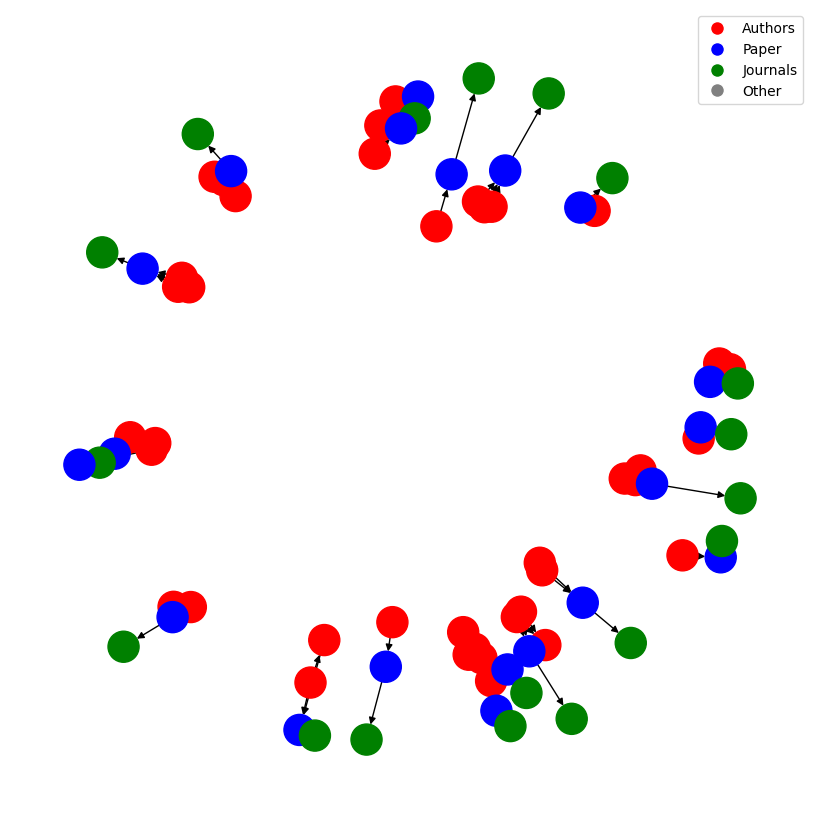

In [7]:
# Create sets for faster membership testing
author_set = set([item for sublist in df_random_20['authors'].tolist() for item in sublist])
title_set = set(df_random_20['title'].tolist())
journal_set = set(df_random_20['journal'].tolist())

colors = []
for node in G:
    if node in author_set:
        colors.append('red')
    elif node in title_set:
        colors.append('blue')
    elif node in journal_set:
        colors.append('green')
    else:
        colors.append('gray')

# Visualization
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_color=colors, node_size=500)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Authors', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Paper', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Journals', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='gray', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.show()


**This multidimensional graph very clearly helps to visualize that multiple authors working on a paper and publishing to a journal**

### **Now lets try with bigger sample dataset to see which journal is more common.**

In [8]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for each dimension
for _, row in df_random_1000.iterrows():
    authors = row['authors']
    title = row['title']
    journal = row['journal']

    # Add nodes and edges for author relationships
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Add an edge between every pair of authors who collaborated on the same article
            G.add_edge(authors[i], authors[j], relationship="collaborated")

    # Add nodes and edges for author-article relationships
    for author in authors:
        G.add_edge(author, title, relationship="wrote")

    # Add nodes and edges for article-journal relationships
    G.add_edge(title, journal, relationship="published_in")

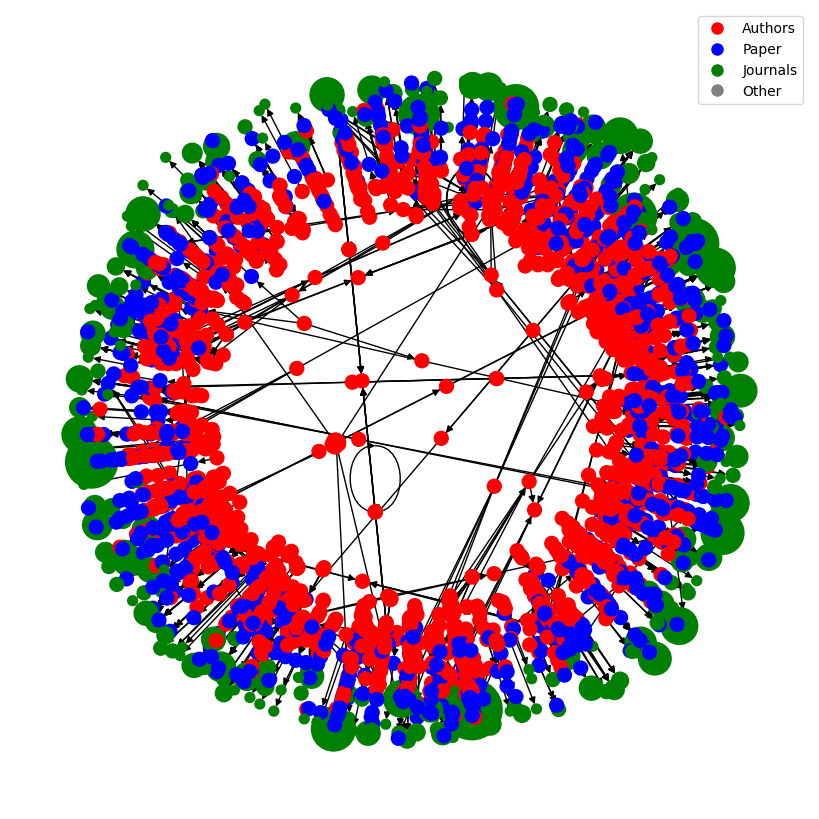

In [9]:
# Create sets for faster membership testing
author_set = set([item for sublist in df_random_1000['authors'].tolist() for item in sublist])
title_set = set(df_random_1000['title'].tolist())
journal_set = set(df_random_1000['journal'].tolist())

# Compute the degrees of the nodes only for journal nodes
degree_dict = dict(G.degree(journal_set))
degrees = [degree_dict.get(node, 0)*50 if node in journal_set else 100 for node in G.nodes()]

# Use different colors for authors, papers, and journals
color_map = []
for node in G:
    if node in author_set:
        color_map.append('red')
    elif node in title_set:
        color_map.append('blue')
    elif node in journal_set:
        color_map.append('green')
    else:
        color_map.append('gray')

# Visualization
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_color=color_map, node_size=degrees)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Authors', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Paper', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Journals', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='gray', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.show()


We can see prominent journals have larger size

## **2. Visualize the co-authorship network**


In [10]:
# !pip install python-louvain

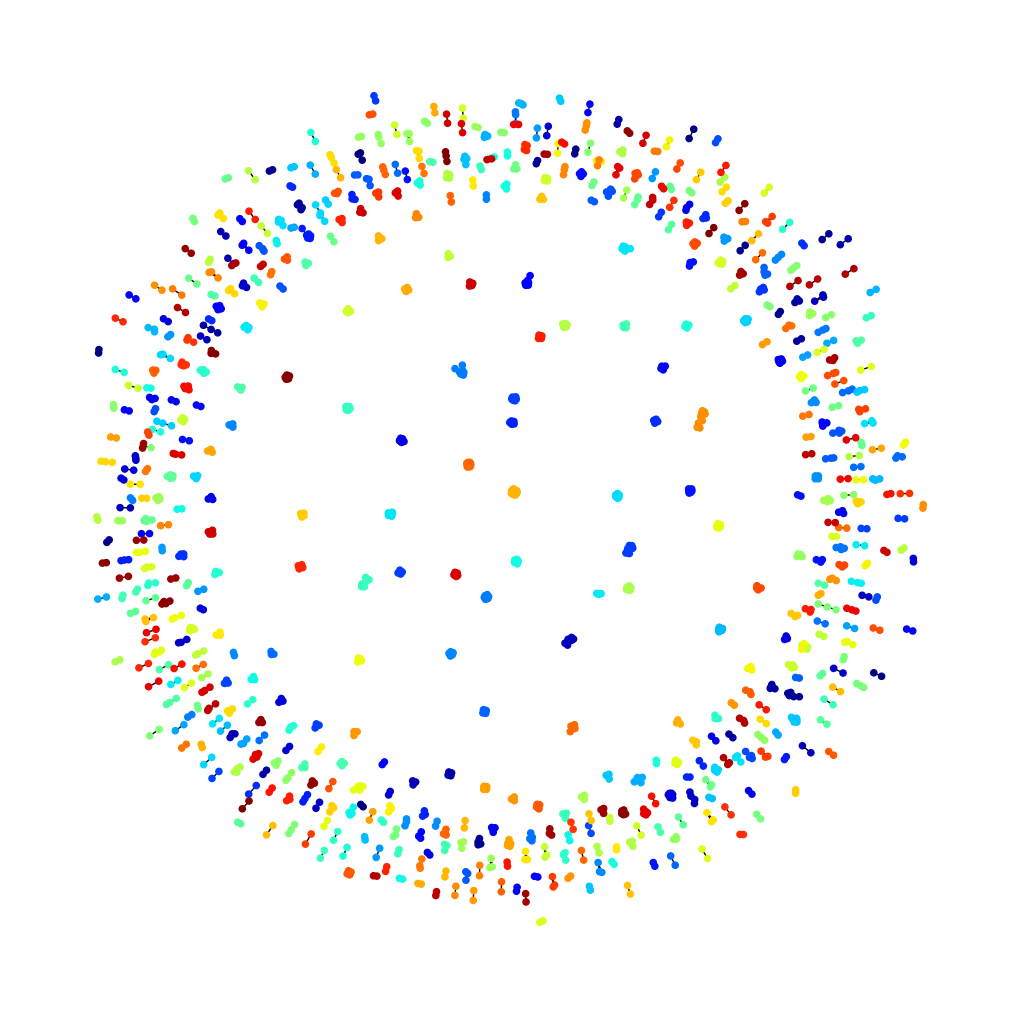

In [11]:
# Import required libraries
from community import community_louvain

# Create a new undirected graph for the co-authorship network
G_coauthor = nx.Graph()

# Add edges for each pair of authors who collaborated on the same article
for authors in df_random_1000['authors']:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # If the edge already exists, increment the weight by one
            if G_coauthor.has_edge(authors[i], authors[j]):
                G_coauthor[authors[i]][authors[j]]['weight'] += 1
            # Else, create a new edge with weight one
            else:
                G_coauthor.add_edge(authors[i], authors[j], weight=1)

# Use the Louvain method to detect communities
partition = community_louvain.best_partition(G_coauthor)

# Create a color map for the communities
community_colors = [partition[node] for node in G_coauthor]

# Visualization
plt.figure(figsize=(10, 10))
nx.draw(G_coauthor, with_labels=False, node_color=community_colors, node_size=20, cmap=plt.cm.jet)
plt.show()


We create a co-authorship network where nodes represent authors and edges represent collaborations between authors. The weight of an edge corresponds to the number of collaborations between two authors.

## **Some more visualization**

**Visualizing the number of papers published per year:**

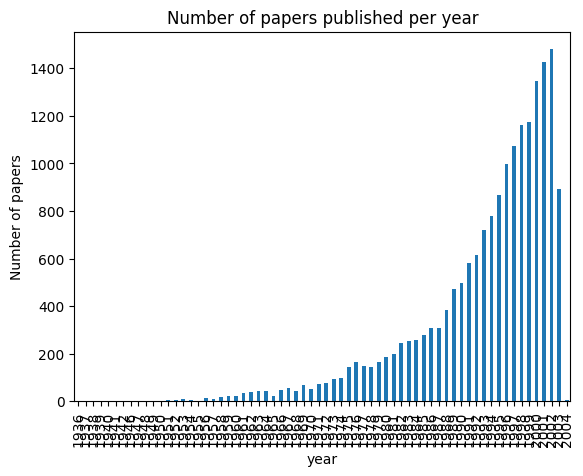

In [12]:
df.groupby('year').size().plot(kind='bar')
plt.title('Number of papers published per year')
plt.ylabel('Number of papers')
plt.show()


**Visualizing the number of unique authors publishing per year:**

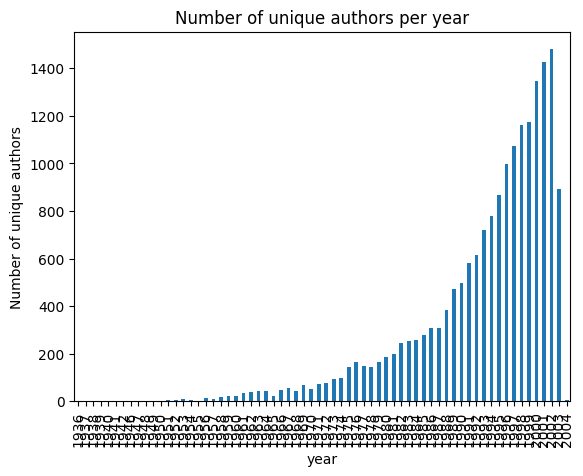

In [13]:
df['unique_authors'] = df['authors'].apply(set)
df.groupby('year')['unique_authors'].apply(len).plot(kind='bar')
plt.title('Number of unique authors per year')
plt.ylabel('Number of unique authors')
plt.show()

# **3b. Classification and Clustering**

### **Topic Clusters:** clustering the papers based on their titles

 We would first preprocess the titles to remove any punctuation, convert to lower case, remove stop words, and apply stemming/lemmatization. Then, we would convert these preprocessed titles into a numerical format using TF-IDF. Finally, we'd apply a clustering algorithm like K-Means to find groups of similar papers.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocess titles
def preprocess_title(title):
    words = word_tokenize(title.lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df_copy = df_random_200.copy();

df_copy['title_preprocessed'] = df_copy['title'].apply(preprocess_title)
df_copy['title_preprocessed']

4517     direct ab initio dynam studi rate constant kin...
2506     analys von multiprozessorsystemen mit prozeßbl...
14597        nomenclatur macrocycl compound sequenti citat
11442        reduc multidimension histogram textur classif
14916                          syntact calculu depend type
                               ...                        
5041                                     geometr algorithm
17366                                          editor note
16920                                 build success system
13745    acorn system cv macro design tree placement tr...
15367             optim fault toler embed distribut system
Name: title_preprocessed, Length: 200, dtype: object

In [16]:
# Convert titles into numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_copy['title_preprocessed'])
print(X)

  (0, 266)	0.2958938368209749
  (0, 41)	0.2593355101749697
  (0, 530)	0.27450858664394684
  (0, 206)	0.2958938368209749
  (0, 346)	0.2958938368209749
  (0, 352)	0.2958938368209749
  (0, 136)	0.2958938368209749
  (0, 528)	0.27450858664394684
  (0, 637)	0.24756635772555144
  (0, 201)	0.2298199652151278
  (0, 327)	0.27450858664394684
  (0, 0)	0.2593355101749697
  (0, 188)	0.2958938368209749
  (1, 516)	0.45795684406205184
  (1, 412)	0.4013752806375873
  (1, 430)	0.45795684406205184
  (1, 717)	0.45795684406205184
  (1, 17)	0.45795684406205184
  (2, 96)	0.45795684406205184
  (2, 590)	0.45795684406205184
  (2, 123)	0.4013752806375873
  (2, 381)	0.45795684406205184
  (2, 442)	0.45795684406205184
  (3, 98)	0.4344145333267743
  (3, 667)	0.4682570574871559
  :	:
  (193, 83)	0.4094647910892901
  (193, 637)	0.3908824783711139
  (194, 444)	0.7331022363349606
  (194, 514)	0.6801184537127922
  (195, 272)	0.8504593409947302
  (195, 13)	0.5260407867407328
  (196, 446)	0.7426095776162283
  (196, 204)	0.6

In [17]:
# Apply K-Means clustering
n_clusters = 5  # Change this to the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

# Add cluster labels to dataframe
df_copy['cluster_label'] = kmeans.labels_

print(f'Silhouette Score: {silhouette_score(X, kmeans.labels_)}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.006070227125479249


In [18]:
# Print out titles from each cluster
for i in range(n_clusters):
    print(f'Cluster {i} Titles:')
    print(df_copy[df_copy['cluster_label'] == i]['title'].head())
    print('\n')


Cluster 0 Titles:
2506     Analyse von Multiprozessorsystemen mit Prozeßb...
14597    Nomenclature of macrocyclic compounds by seque...
14916             Syntactic Calculus with Dependent Types.
17266            The Graph of Linear Extensions Revisited.
10063           On Reducibility to Complex or Sparse Sets.
Name: title, dtype: object


Cluster 1 Titles:
4517     Direct ab initio dynamics study on the rate co...
7874     Digital payment systems for Internet commerce:...
8267                 Mobile telephony in a connected life.
14590    Process Design Principles: Synthesis, Analysis...
7868     A Study of Building Internet Marketplaces on t...
Name: title, dtype: object


Cluster 2 Titles:
13201    The knowledge on information content of proble...
17037    Evidence Measures Induced by Kripke's Accessib...
4018     Lattice Rings: Coordinates for Self-Similar Hi...
14414           Database design for information retrieval.
65       Information Security in a Multi-User Computer ...
Nam

Reducing dimensions for visualization purpose

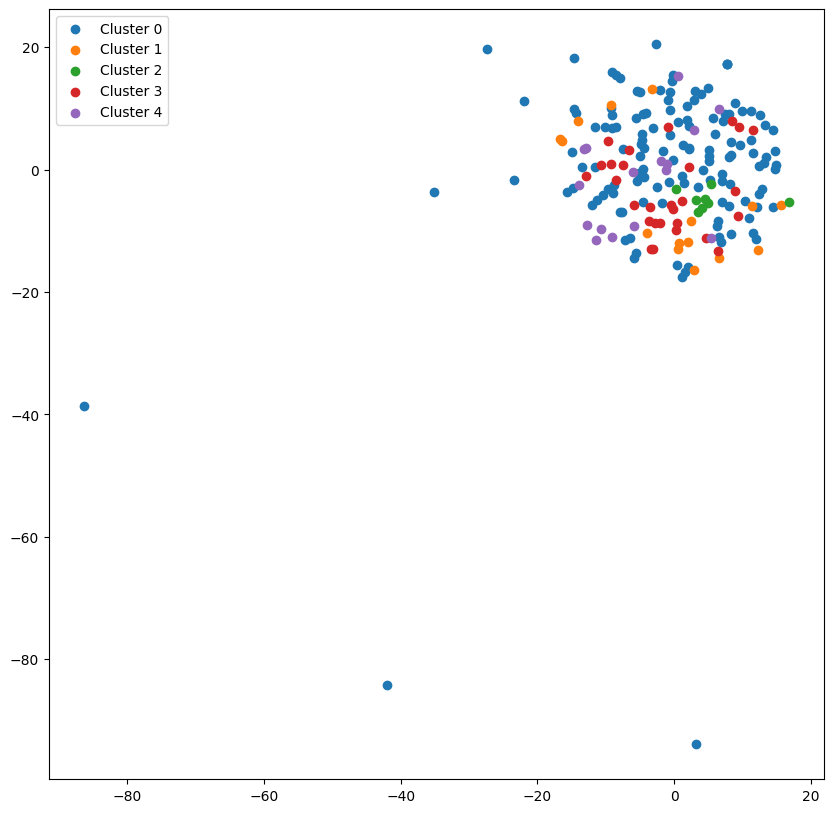

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, init='random', random_state=42)
X_2d = tsne.fit_transform(X)


# Create a scatter plot of the t-SNE output, coloring each point by its cluster assignment
plt.figure(figsize=(10, 10))
for i in range(n_clusters):
    plt.scatter(X_2d[kmeans.labels_ == i, 0], X_2d[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.legend()
plt.show()


### **Journal Clusters:** cluster journals based on the types of articles they publish.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [21]:
# Combine all paper titles for each journal into a single string
df_copy_2 = df_random_1000.copy()
df_copy_2['title'] = df_copy_2['title'].apply(lambda x: x.lower())  # convert to lowercase
grouped = df_copy_2.groupby('journal')['title'].apply(' '.join).reset_index()

In [22]:
# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(grouped['title'])

In [23]:
# Run KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign the cluster labels
grouped['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Print out titles from each cluster
n_clusters = 5
for i in range(n_clusters):
    print(f'Cluster {i} Journals:')
    print(grouped[grouped['cluster'] == i]['journal'].head())
    print('\n')

Cluster 0 Journals:
106    IEEE Trans. Computers
Name: journal, dtype: object


Cluster 1 Journals:
39                                      Commun. ACM
42                                       Comput. J.
144    International Journal of Man-Machine Studies
224                           Softw., Pract. Exper.
Name: journal, dtype: object


Cluster 2 Journals:
174    Journal of Computational Chemistry
Name: journal, dtype: object


Cluster 3 Journals:
119    Inf. Process. Lett.
Name: journal, dtype: object


Cluster 4 Journals:
0                    ACM Comput. Surv.
1                            ACM Queue
2            ACM SIGMOD Digital Review
3              ACM Trans. Comput. Log.
4    ACM Trans. Comput.-Hum. Interact.
Name: journal, dtype: object




In [25]:
grouped.head()

,journal,title,cluster
0,ACM Comput. Surv.,the computer in the humanities and fine arts. ...,4
1,ACM Queue,"soc: software, hardware, nightmare, bliss.",4
2,ACM SIGMOD Digital Review,review - a novel index supporting high volume ...,4
3,ACM Trans. Comput. Log.,weak alternating automata are not that weak.,4
4,ACM Trans. Comput.-Hum. Interact.,the goms family of user interface analysis tec...,4


### **1. Classification**

Now, you can use a classification model to predict the research interests of a new author. Train the model using the feature vectors of the authors as inputs, and their cluster labels as targets.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [27]:
# Create a new DataFrame where each row is an author-paper pair
df_copy_3 = df_1000.copy()
df_flattened = df_copy_3.explode('authors')

# Combine all titles for each author
df_flattened['title_combined'] = df_flattened.groupby('authors')['title'].transform(lambda x: ' '.join(x))

In [28]:
# Remove duplicates
df_flattened = df_flattened[['authors', 'title_combined']].drop_duplicates()

# Fill missing values with an empty string
df_flattened['title_combined'].fillna("", inplace=True)

In [29]:
# Define the number of clusters
n_clusters = 5

# Create a pipeline that transforms the data using TF-IDF and then performs k-means clustering
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
])

# Assign each author to a cluster
df_flattened['cluster_label'] = pipeline.fit_predict(df_flattened['title_combined'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To classify a new author, you would combine all their paper titles into a single string, and then call pipeline.predict() with that string.

In [30]:
new_author_titles = 'Deep Learning-Based Object Recognition in Real-Time Systems. A Comparative Study of Machine Learning Algorithms for Sentiment Analysis Natural Language Processing Techniques for Text Summarization'
new_author_cluster = pipeline.predict([new_author_titles])[0]

print(f'New author belongs to cluster {new_author_cluster}.')


New author belongs to cluster 2.


### **Now lets apply Random forest to train a classifier to predict cluster**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataframe here
df = grouped.copy()

# Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['title']).toarray()
y = df['cluster']

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training set
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
[[48]]
